In [15]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from cassandrautils import *

In [16]:
weather = getWeatherDF()
weather.head(5)

,location,forecastdate,description,feels_like,humidity,pressure,sunrise,sunset,temp,temp_max,temp_min,wind
0,Ho Chi Minh City,2024-11-26 09:47:26,clear sky,308.320007,60.0,1007.0,1732575234,1732616867,304.299988,304.299988,304.160004,3.6
1,Ho Chi Minh City,2024-11-26 09:48:26,clear sky,308.320007,60.0,1007.0,1732575234,1732616867,304.299988,304.299988,304.160004,3.6
2,Ho Chi Minh City,2024-11-26 09:49:26,clear sky,308.320007,60.0,1007.0,1732575234,1732616867,304.299988,304.299988,304.160004,3.6
3,Ho Chi Minh City,2024-11-26 09:50:27,clear sky,308.320007,60.0,1007.0,1732575234,1732616867,304.299988,304.299988,304.160004,3.6
4,Ho Chi Minh City,2024-11-26 09:51:27,clear sky,308.320007,60.0,1007.0,1732575234,1732616867,304.299988,304.299988,304.160004,3.6


In [17]:
weather['celsius_temp'] = weather['temp'] - 273.15
weather['celsius_temp_max'] = weather['temp_max'] - 273.15
weather['celsius_temp_min'] = weather['temp_min'] - 273.15

In [18]:
weather['forecastdate_rounded'] = weather['forecastdate'].dt.round("min")

In [19]:
hanoi_weather = weather[weather['location'] == 'Hanoi']
hanoi_weather.head(5)

,location,forecastdate,description,feels_like,humidity,pressure,sunrise,sunset,temp,temp_max,temp_min,wind,celsius_temp,celsius_temp_max,celsius_temp_min,forecastdate_rounded
18,Hanoi,2024-11-26 09:46:55,overcast clouds,292.75,59.0,1018.0,1732576450,1732616047,293.149994,293.149994,293.149994,3.13,19.999994,19.999994,19.999994,2024-11-26 09:47:00
19,Hanoi,2024-11-26 09:47:56,overcast clouds,292.75,59.0,1018.0,1732576450,1732616047,293.149994,293.149994,293.149994,3.13,19.999994,19.999994,19.999994,2024-11-26 09:48:00
20,Hanoi,2024-11-26 09:48:56,overcast clouds,292.75,59.0,1018.0,1732576450,1732616047,293.149994,293.149994,293.149994,3.13,19.999994,19.999994,19.999994,2024-11-26 09:49:00
21,Hanoi,2024-11-26 09:49:57,overcast clouds,292.75,59.0,1018.0,1732576450,1732616047,293.149994,293.149994,293.149994,3.13,19.999994,19.999994,19.999994,2024-11-26 09:50:00
22,Hanoi,2024-11-26 09:50:57,overcast clouds,292.75,59.0,1018.0,1732576450,1732616047,293.149994,293.149994,293.149994,3.13,19.999994,19.999994,19.999994,2024-11-26 09:51:00


In [20]:
hochiminh_weather = weather[weather['location'] == 'Ho Chi Minh City']
hochiminh_weather.head(5)

,location,forecastdate,description,feels_like,humidity,pressure,sunrise,sunset,temp,temp_max,temp_min,wind,celsius_temp,celsius_temp_max,celsius_temp_min,forecastdate_rounded
0,Ho Chi Minh City,2024-11-26 09:47:26,clear sky,308.320007,60.0,1007.0,1732575234,1732616867,304.299988,304.299988,304.160004,3.6,31.149988,31.149988,31.010004,2024-11-26 09:47:00
1,Ho Chi Minh City,2024-11-26 09:48:26,clear sky,308.320007,60.0,1007.0,1732575234,1732616867,304.299988,304.299988,304.160004,3.6,31.149988,31.149988,31.010004,2024-11-26 09:48:00
2,Ho Chi Minh City,2024-11-26 09:49:26,clear sky,308.320007,60.0,1007.0,1732575234,1732616867,304.299988,304.299988,304.160004,3.6,31.149988,31.149988,31.010004,2024-11-26 09:49:00
3,Ho Chi Minh City,2024-11-26 09:50:27,clear sky,308.320007,60.0,1007.0,1732575234,1732616867,304.299988,304.299988,304.160004,3.6,31.149988,31.149988,31.010004,2024-11-26 09:50:00
4,Ho Chi Minh City,2024-11-26 09:51:27,clear sky,308.320007,60.0,1007.0,1732575234,1732616867,304.299988,304.299988,304.160004,3.6,31.149988,31.149988,31.010004,2024-11-26 09:51:00


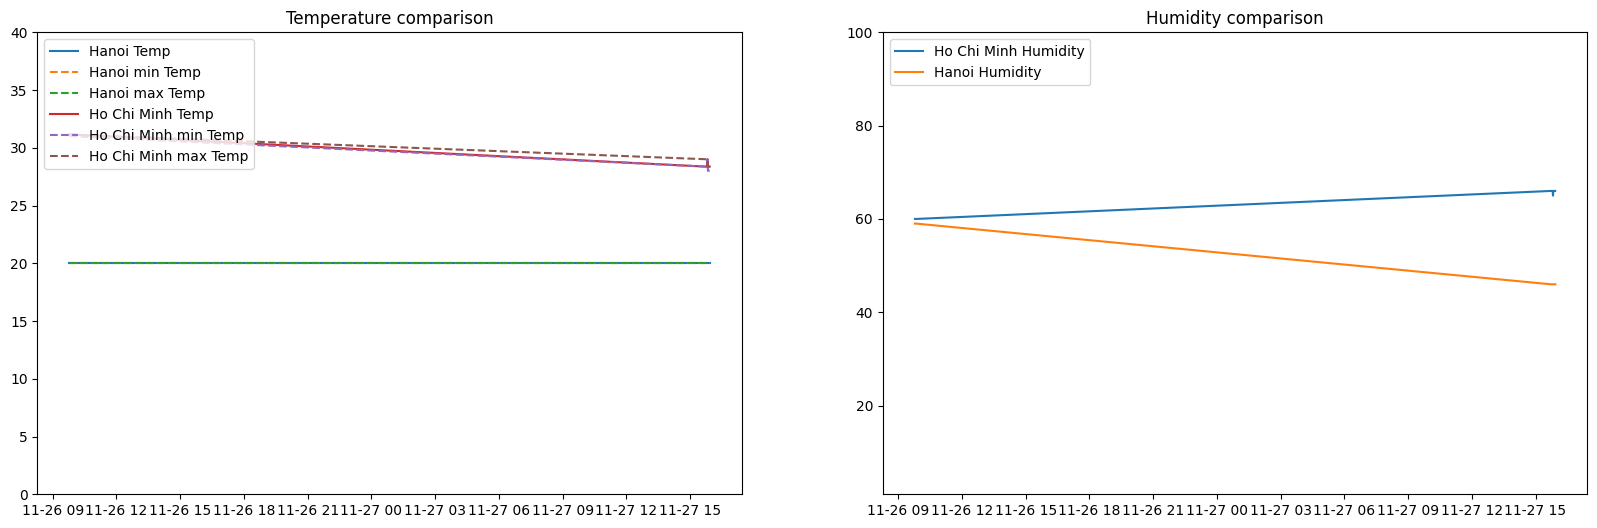

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))
ax = ax.flatten()


ax[0].plot(hanoi_weather['forecastdate'], hanoi_weather['celsius_temp'], label="Hanoi Temp")
ax[0].plot(hanoi_weather['forecastdate'], hanoi_weather['celsius_temp_min'], '--',label="Hanoi min Temp")
ax[0].plot(hanoi_weather['forecastdate'], hanoi_weather['celsius_temp_max'], '--',label="Hanoi max Temp")

ax[0].plot(hochiminh_weather['forecastdate'], hochiminh_weather['celsius_temp'], label="Ho Chi Minh Temp") 
ax[0].plot(hochiminh_weather['forecastdate'], hochiminh_weather['celsius_temp_min'], '--',label="Ho Chi Minh min Temp")
ax[0].plot(hochiminh_weather['forecastdate'], hochiminh_weather['celsius_temp_max'], '--',label="Ho Chi Minh max Temp")

ax[0].set_ylim(0, 40)
ax[0].set_title("Temperature comparison")

ax[0].legend(loc="upper left")

ax[1].plot(hochiminh_weather['forecastdate'], hochiminh_weather['humidity'], label="Ho Chi Minh Humidity")
ax[1].plot(hanoi_weather['forecastdate'], hanoi_weather['humidity'], label="Hanoi Humidity")
ax[1].legend(loc="upper left")

ax[1].set_ylim(1, 100)
ax[1].set_title("Humidity comparison")

fig.show()